In [347]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

In [348]:
Ainit = 1e-5
kon = 1e5
rho = 1
k = kon*Ainit*rho
rtot = 1e5
Target_cell_number = 20000
Atot = 1e16*Ainit/Target_cell_number
koff = 1e-4
delta = 4

In [349]:
beta = Atot/rtot
print(beta)

50.00000000000001


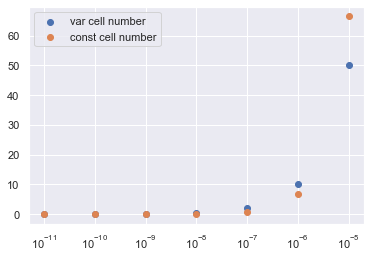

In [350]:
# different beta plots repfeclting different assumptions/assay conditions

concentrations = [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
varying_cell_number_betas = [0.003, 0.016, 0.08, 0.4, 2, 10, 50]

def beta_const_cell_number(conc):
    return (0.12/(150000*6.0221408e-23))*conc*(1/(rtot*Target_cell_number))

const_cell_betas = []
for const in concentrations:
    const_cell_betas.append(beta_const_cell_number(const))

sns.set_theme()
plt.scatter(concentrations, varying_cell_number_betas, label='var cell number')
plt.scatter(concentrations, const_cell_betas, label = 'const cell number')
plt.xscale('log')
plt.legend(loc='best')
plt.show()

In [351]:
for i in range(len(varying_cell_number_betas)):
    print(abs(varying_cell_number_betas[i]- const_cell_betas[i]))

0.0029335784377542288
0.015335784377542286
0.07335784377542286
0.3335784377542286
1.3357843775422853
3.357843775422854
16.42156224577147


In [352]:
def model(t, z):
    dA1 = (2/rtot)*k*(rtot-z[0]-2*z[1])*(Atot-z[0]-z[1]) - koff*z[0] - (delta/rtot)*k*(rtot-z[0]-2*z[1])*z[0] + 2*koff*z[1]
    dA2 = (delta/rtot)*k*(rtot-z[0]-2*z[1])*z[0] - 2*koff*z[1]

    return [dA1, dA2]

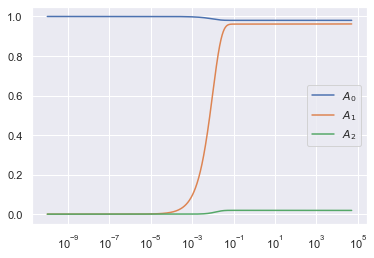

In [353]:
t_end = 100000/2
t = np.geomspace(1e-10, t_end, 5000)
tspan = [1e-10, t_end]
z0 = [0, 0]

z = solve_ivp(model, tspan, z0, method='Radau', t_eval=t)

A1 = z.y[0]/rtot
A2 = z.y[1]/rtot
A0 = (Atot - z.y[0] - z.y[1])/Atot

sns.set_theme()
plt.plot(t, A0, label = r'$A_0$')
plt.plot(t, A1, label = r'$A_1$')
plt.plot(t, A2, label = r'$A_2$')
plt.xscale('log')
plt.legend(loc='best')
plt.show()

Dimensionless model

In [354]:
alpha = k/koff
beta = Atot/rtot
delta = 4

t_end = 10
t = np.geomspace(1e-10, t_end, 5000)
tspan = [1e-10, t_end]
z0 = [0, 0]

In [355]:
def dimensionless_model(t, z):
    dA1 = 2*alpha*(1-z[0]-2*z[1])*(beta-z[0]-z[1]) - z[0] - delta*alpha*(1-z[0]-2*z[1])*z[0] + 2*z[1]
    dA2 = delta*alpha*(1-z[0]-2*z[1])*z[0] - 2*z[1]

    return [dA1, dA2]

In [356]:
def dimensionless_surplus_model(t, z):
    dA1 = 2*alpha*(1-z[0]-2*z[1])*beta - z[0] - delta*alpha*(1-z[0]-2*z[1])*z[0] + 2*z[1]
    dA2 = delta*alpha*(1-z[0]-2*z[1])*z[0] - 2*z[1]

    return [dA1, dA2]

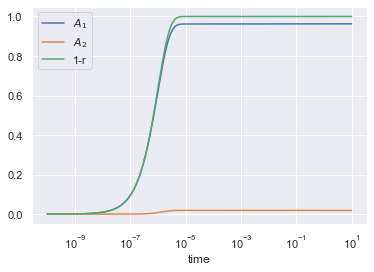

In [357]:
z = solve_ivp(dimensionless_surplus_model, tspan, z0, method='Radau', t_eval=t)

A1 = z.y[0]
A2 = z.y[1]
#A0 = 1 - (1/beta)*A1 - (1/beta)*A2

A10 = (2/(2*beta + alpha))*(1 - np.exp(-(2*beta + alpha)*t))
r = 1 - (1 - A1 - 2*A2)
sns.set_theme()
#plt.plot(t, A0, label = r'$A_0$')
plt.plot(t, A1, label = r'$A_1$')
plt.plot(t, A2, label = r'$A_2$')
plt.plot(t, r, label = '1-r')
#plt.plot(t, A10)
plt.xlabel('time')
plt.xscale('log')
plt.legend(loc='best')
plt.show()

Phase Plane

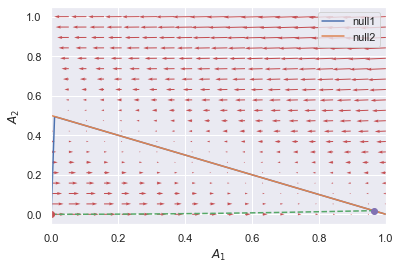

In [358]:
y1 = np.linspace(0, 1, 20)
y2 = np.linspace(0, 1, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

A1, A2 = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = dimensionless_surplus_model(t, [x, y])
        A1[i, j] = yprime[0]
        A2[i, j] = yprime[1]

def null1(x):

    return (delta*alpha*(1-x)*x)/(2*(1+delta*alpha*x))

def null2(x):
    return (2*alpha*beta*(1-x) - x - delta*alpha*(1-x)*x)/(2*(2*alpha*beta - 1 - delta*alpha*x))

def A1root(x):

    return 0.5*(1-2*x + ((2*x - 1)**2 - (8/(delta*alpha))*x)**(0.5))

def A1root1(x):

    return ((2*delta*alpha*x - 2*alpha*beta - 1 - delta*alpha) + (((2*alpha*beta + 1 + delta*alpha - 2*delta*alpha*x)**2 - 4*delta*alpha*(4*alpha*beta*x - 2*alpha*beta - 2*x))**(0.5)))/(2*delta*alpha)


A1s = np.linspace(0, 1, 100)

plt.plot(A1s, null1(A1s), label = 'null1')
plt.plot(A1s, null2(A1s), label = 'null2')
#plt.plot(A1root(A1s), A1s, label = 'A1 root')
#plt.plot(A1root1(A1s), A1s, label = 'A1 root 1')
plt.legend()
plt.xlim([0, 1])

Q = plt.quiver(Y1, Y2, A1, A2, color='r')
z1 = z.y[0]
z2 = z.y[1]
plt.plot(z1, z2, '--')
plt.plot([z1[0]], [z2[0]], 'o')
plt.plot([z1[-1]], [z2[-1]], 'o')
plt.xlabel(r'$A_1$')
plt.ylabel(r'$A_2$')
plt.show()
        

Single cell model with receptor internalization and recycling

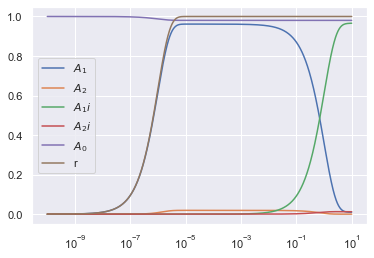

In [359]:
kint = 1e-4
krec = 1e-6
alphaint = kint/koff
alpharec = krec/koff

def recycling_model(t, z):
    dA1 = 2*alpha*(1-z[0]-z[2]-2*(z[1]+z[3]))*(beta-z[0]-z[1]-z[2]-z[3]) - z[0] - delta*alpha*(1-z[0]-z[2]-2*(z[1]+z[3]))*z[0] + 2*z[1] - alphaint*z[0] + alpharec*z[2]
    dA2 = delta*alpha*(1-z[0]-z[2]-2*(z[1]+z[3]))*z[0] - 2*z[1] - alphaint*z[1] + alpharec*z[3]
    dA1i = alphaint*z[0] - alpharec*z[2]
    dA2i = alphaint*z[1] - alpharec*z[3]
    dz = [dA1, dA2, dA1i, dA2i]

    return dz

t_end = 10
t = np.geomspace(1e-10, t_end, 1000)
tspan = [0, t_end]
z0 = [0, 0, 0, 0]

z = solve_ivp(recycling_model, tspan, z0, method='Radau', t_eval=t)

A1 = z.y[0]
A2 = z.y[1]
A1i = z.y[2]
A2i = z.y[3]
A0 = 1 - (1/beta)*A1 - (1/beta)*A2 - (1/beta)*A1i - (1/beta)*A2i
r = 1 - (1 - A1 - A1i - 2*(A2 + A2i))

plt.plot(t, A1, label = r'$A_1$')
plt.plot(t, A2, label = r'$A_2$')
plt.plot(t, A1i, label = r'$A_1i$')
plt.plot(t, A2i, label = r'$A_2i$')
plt.plot(t, A0, label = r'$A_0$')
plt.plot(t, r, label = 'r')
plt.xscale('log')
plt.legend(loc='best')
plt.show()